# Solving MNIST with Convolutional Neural Networks

In this notebook we will look at how to deal with image datasets. As an example we will use the famous MNIST dataset.

https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.
/home/s/S.Rasp/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
np.random.seed(42)

In [3]:
DATADIR = './mnist/'

## MNIST - Preparing and exploring the data

Keras has a handy function to download the entire MNIST dataset which consists of 60,000 training images and 10000 test images.

In [4]:
df_train = pd.read_csv(f'{DATADIR}train.csv')
df_test = pd.read_csv(f'{DATADIR}test.csv')

In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
len(df_train), len(df_test)

(42000, 28000)

In [8]:
y_train = np.array(df_train['label'])
X_train = np.array(df_train.drop(['label'], axis=1))
X_test = np.array(df_test)

In [9]:
X_train.shape

(42000, 784)

In [10]:
X_train.max()

255

In [11]:
# Reshape and normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.

In [12]:
# Split into training and validation set
X_train, X_valid, y_train, y_valid =  train_test_split(X_train, y_train)
X_train.shape, X_valid.shape

((31500, 28, 28, 1), (10500, 28, 28, 1))

In [13]:
def plots(xs, ys):
    nfigs = xs.shape[0]; ncols = min(3, nfigs); nrows = int(np.floor(nfigs / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    for i, ax in enumerate(axs.flat):
        ax.imshow(xs[i].squeeze(), cmap='gray')
        ax.set_title(str(ys[i]))
        ax.set_xticks([]); ax.set_yticks([])

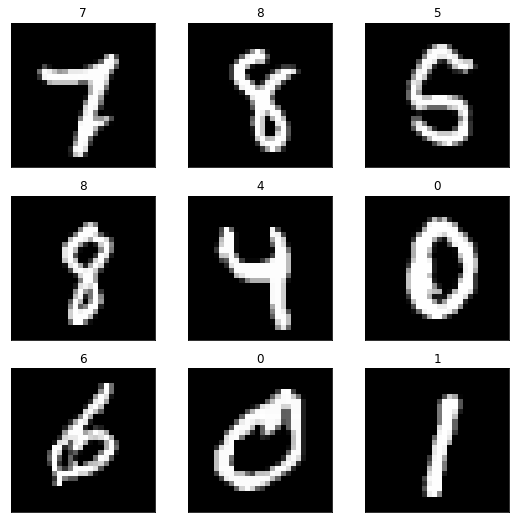

In [14]:
plots(X_train[:9], y_train[:9])

For this classification problem, we will one-hot-encode the labels.

In [15]:
y_train[:3]

array([7, 8, 5])

In [17]:
yoh_train, yoh_valid = [to_categorical(y) for y in [y_train, y_valid]]

In [18]:
yoh_train[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## Train a neural network with flattened images

In [19]:
def flatten(x): return x.reshape(x.shape[0], -1)

In [20]:
X_train_flat = flatten(X_train)
X_valid_flat = flatten(X_valid)
X_test_flat = flatten(X_test)

In [21]:
X_train_flat.shape

(31500, 784)

In [22]:
nn = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [23]:
def softmax(x):
    np.exp(x) / np.sum(np.exp(x))

In [24]:
z = [2, 6, 3, 5]

In [25]:
np.exp(z)

array([  7.3890561 , 403.42879349,  20.08553692, 148.4131591 ])

In [26]:
out = np.exp(z) / np.sum(np.exp(z))
out, out.sum()

(array([0.01275478, 0.69638749, 0.03467109, 0.25618664]), 1.0)

Next we need to judge how good our predictions is. For classification we use the categorical crossentropy:

$L = - \sum_c y_t^c \log(y_p^c)$

$c$ is the class, so one of our ten numbers.

In [27]:
nn.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [28]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [29]:
nn.fit(X_train_flat, yoh_train, batch_size=512, epochs=10, validation_data=(X_valid_flat, yoh_valid))

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 1s 40us/step - loss: 0.6779 - acc: 0.8204 - val_loss: 0.3212 - val_acc: 0.9090
Epoch 2/10
31500/31500 [==============================] - 0s 15us/step - loss: 0.2734 - acc: 0.9246 - val_loss: 0.2499 - val_acc: 0.9279
Epoch 3/10
31500/31500 [==============================] - 0s 15us/step - loss: 0.2166 - acc: 0.9396 - val_loss: 0.2120 - val_acc: 0.9399
Epoch 4/10
31500/31500 [==============================] - 0s 15us/step - loss: 0.1809 - acc: 0.9496 - val_loss: 0.1818 - val_acc: 0.9485
Epoch 5/10
31500/31500 [==============================] - 0s 15us/step - loss: 0.1537 - acc: 0.9573 - val_loss: 0.1666 - val_acc: 0.9543
Epoch 6/10
31500/31500 [==============================] - 0s 15us/step - loss: 0.1319 - acc: 0.9632 - val_loss: 0.1456 - val_acc: 0.9608
Epoch 7/10
31500/31500 [==============================] - 0s 16us/step - loss: 0.1137 - acc: 0.9693 - val_loss: 0.1344 - val_acc

## CNN

To take advantage of the spatial information in images we can use convolutions rather than fully connected layers.

http://setosa.io/ev/image-kernels/

In [30]:
cnn = Sequential([
    Conv2D(32, kernel_size=5, strides=2, activation='relu', padding='same', 
           input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same'),
    Conv2D(128, kernel_size=3, strides=2, activation='relu', padding='same'),
    Flatten(),
    Dense(10, activation='softmax'),
])

In [31]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 113,674
Trainable params: 113,674
Non-trainable params: 0
_________________________________________________________________


In [32]:
cnn.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
cnn.fit(X_train, yoh_train, batch_size=512, epochs=10, validation_data=(X_valid, yoh_valid))

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 2s 59us/step - loss: 0.8566 - acc: 0.7562 - val_loss: 0.3078 - val_acc: 0.9129
Epoch 2/10
31500/31500 [==============================] - 1s 26us/step - loss: 0.2452 - acc: 0.9285 - val_loss: 0.1985 - val_acc: 0.9433
Epoch 3/10
31500/31500 [==============================] - 1s 27us/step - loss: 0.1606 - acc: 0.9523 - val_loss: 0.1320 - val_acc: 0.9617
Epoch 4/10
31500/31500 [==============================] - 1s 27us/step - loss: 0.1137 - acc: 0.9664 - val_loss: 0.1038 - val_acc: 0.9689
Epoch 5/10
31500/31500 [==============================] - 1s 29us/step - loss: 0.0876 - acc: 0.9740 - val_loss: 0.0989 - val_acc: 0.9687
Epoch 6/10
31500/31500 [==============================] - 1s 27us/step - loss: 0.0753 - acc: 0.9775 - val_loss: 0.0862 - val_acc: 0.9734
Epoch 7/10
31500/31500 [==============================] - 1s 26us/step - loss: 0.0618 - acc: 0.9818 - val_loss: 0.0677 - val_acc

### Submit to kaggle

In [34]:
preds = cnn.predict(X_test)
pred_idxs = np.argmax(preds, axis=1)

In [38]:
df =  pd.DataFrame({'ImageId': range(1, len(preds)+1), 'Label': pred_idxs})

In [39]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [40]:
df.to_csv(DATADIR + 'cnn.csv', index=False)